# Import data

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [ ]:
df = pd.read_csv("cleaned-reviews.csv",index_col=0)

In [ ]:
df = df.reset_index()

In [ ]:
df

,index,reviews,date,stars,corpus
0,0,"Facebook full of romance scams, vehicle scams,...",2023-11-12,1,facebook full romance scam vehicle scam crypto...
1,1,FB Marketplace a scammers paradise.I'd say mor...,2023-11-10,1,fb marketplace scammer paradise say half add s...
2,2,Absolutely rubbish they encourage you to repor...,2023-11-11,1,absolutely rubbish encourage report bullying a...
3,3,1 star is too generous. My Facebook account ac...,2023-11-12,1,1 star generous facebook account active since ...
4,4,Facebook has let someone hack a dead man's acc...,2023-11-12,1,facebook let someone hack dead man account loa...
...,...,...,...,...,...
1839,1995,"Thoroughly recommended, quick and efficient, m...",2022-01-22,5,thoroughly recommended quick efficient many th...
1840,1996,"Facebook allows Fake & ""Alias"" accounts for pe...",2022-01-22,1,facebook allows fake alias account people bad ...
1841,1997,Poor standards and support. Reported video whe...,2022-01-22,1,poor standard support reported video animal ki...
1842,1998,This is nothing less than the world's biggest ...,2022-01-22,1,nothing le world biggest pedophile site need s...


# Summarizing Reviews

#### What is the average overall rating given for rating?

In [ ]:
df['stars'].mean()

1.4126898047722343

#### What is the total counts for each ratings?

Create a new dataframe called *df_ratings* to store the frequency of each value in *star* column.

Calculate the percentage of each star rating and round it to two decimal places, then add these values to *pct_values* column.

Dataframe *df_ratings* shows the distribution of star ratings and their percentages in the reviews.

In [ ]:
df_ratings = pd.DataFrame(df.stars.value_counts())
pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

Reset index of the dataframe.

In [ ]:
df_ratings = df_ratings.reset_index()

Replace columns' name of the dataframe.

In [ ]:
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)

Create a bar plot which shows the distribution of star ratings and their counts in the reviews, with the highest bar highlighted in red and the others in grey.

Text(0.5, 1.0, 'Counts for each ratings')

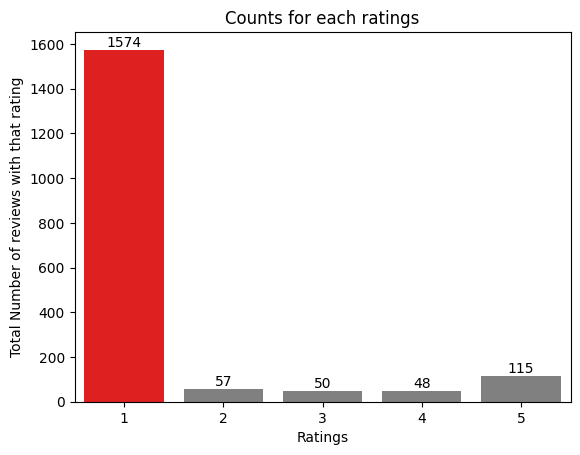

In [ ]:
clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)

ax.bar_label(ax.containers[0])

ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

#### Time Series Analysis

Create an interactive line plot to visualize how a numerical value *stars* changes over time *date*.

Enhance the plot's interactivity by adding a range slider beneath the x-axis

This slider allows users to to zoom in and out on specific sections of the data.

In [ ]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

Create and visualize a word cloud, a visual representation of text data where word frequencies are depicted by font size and placement.

It helps identify prominent themes and patterns within a body of text in thereviews, making it easier to grasp key concepts and trends.

Create a set of English stop words for efficient filtering. Then combine text data in a column named *corpus* in *df* dataframe into a single string, preparing for word cloud creation.

Generate the Word Cloud with specified parameters.



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


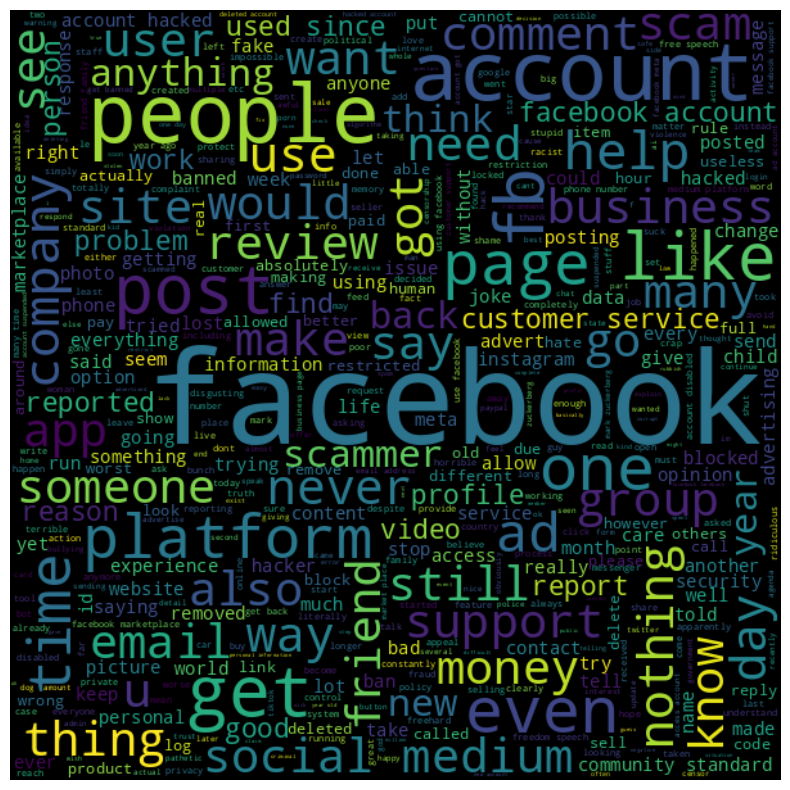

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))


wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Identify the most frequent words within the body of text in the reviews. This helps understand common themes, patterns, and word usage in the text.

Split the text in reviews into a list of individual words.

Create a *FreqDist* object to count word frequencies and extract the 20 most frequent words.Then create a dataframe to contain their frequencies.

In [ ]:
from nltk import ngrams
from nltk.probability import FreqDist


new_words = reviews.split(" ")


nlp_words=FreqDist(new_words).most_common(20)


all_fdist = pd.Series(dict(nlp_words))

Visualize a bar plot which shows the frequencies of the most common words in a dataset *all_fdist*, making it easier to grasp word usage patterns.

Rotate the x-axis labels (words) by 30 degrees to prevent overlapping and improve readability.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'facebook'),
  Text(1, 0, 'account'),
  Text(2, 0, 'people'),
  Text(3, 0, 'get'),
  Text(4, 0, 'time'),
  Text(5, 0, 'like'),
  Text(6, 0, 'post'),
  Text(7, 0, 'one'),
  Text(8, 0, 'fb'),
  Text(9, 0, 'platform'),
  Text(10, 0, 'even'),
  Text(11, 0, 'page'),
  Text(12, 0, 'ad'),
  Text(13, 0, 'day'),
  Text(14, 0, 'friend'),
  Text(15, 0, 'business'),
  Text(16, 0, 'nothing'),
  Text(17, 0, 'hacked'),
  Text(18, 0, 'use'),
  Text(19, 0, 'help')])

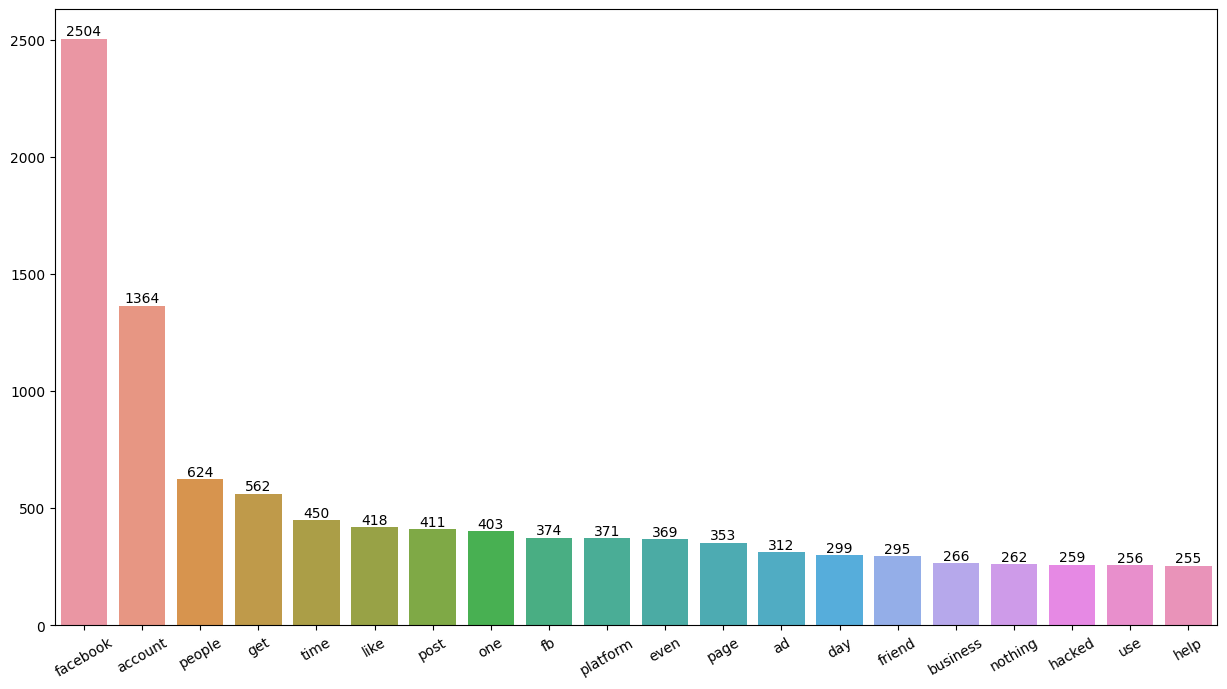

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

Identify and visualize the most common word sequences (n-grams) within a body of text, revealing patterns of word usage and common phrases.

Define get_freq_dist function :


*   Create n-grams (sequences of number_of_ngrams words) in the input text
*   Calculate n-gram frequencies and extract the 40 most frequent n-grams.
*   Sort the n-grams by frequency and join words within each n-gram using underscores.
*   Create a horizontal bar plot which shows frequencies of n-grams.



<Axes: >

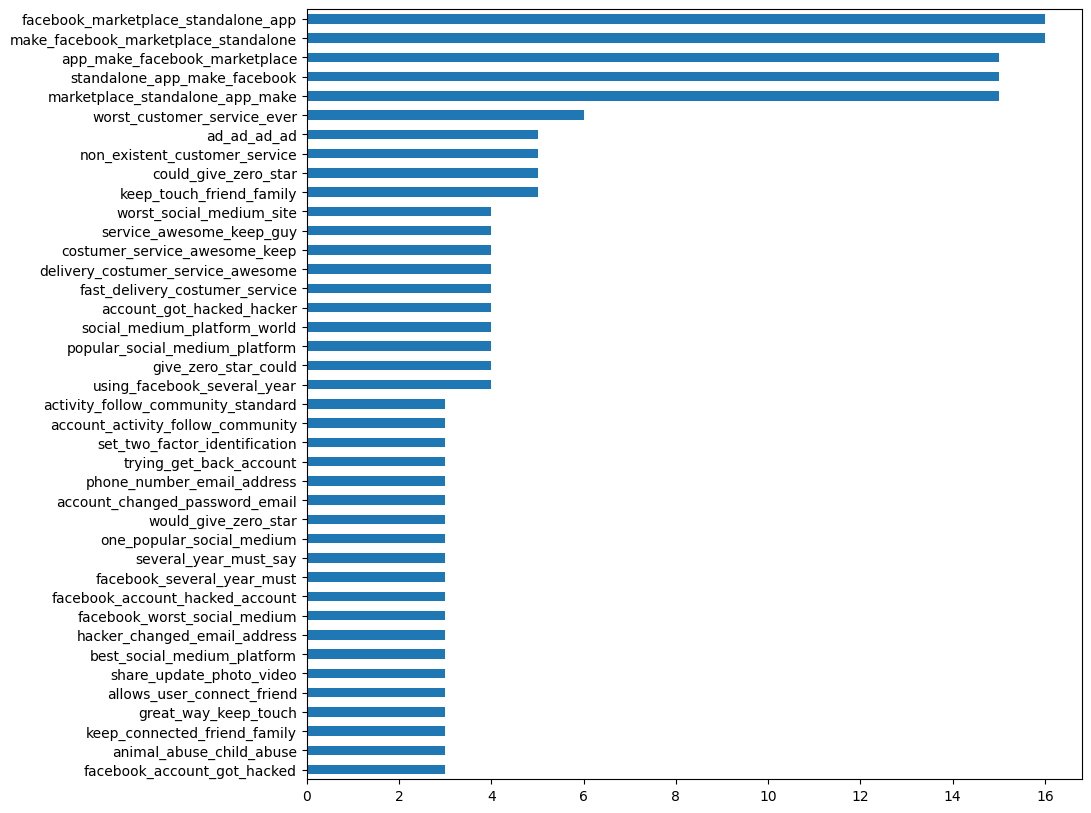

In [ ]:
import nltk.collocations as collocations
from nltk import bigrams

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams


    ngrams = ngrams(new_words, number_of_ngrams)


    ngram_fd = FreqDist(ngrams).most_common(40)


    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}


    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")

    return ax


get_freq_dist(new_words,4)

# Detecting Sentiment in text

#### VADER Sentiment Scoring

Analyze the sentiment (positive, negative, or neutral) of text data within a DataFrame using the VADER sentiment analysis tool.

Create an *SentimentIntensityAnalyzer* object for sentiment analysis.

Prepare result dictionary by creating an empty dictionary to store sentiment scores for each text.

Loop over each row of the dataframe and extract the text and index values for the current row.

Apply sentiment analysis to the text using VADER and store the resulting sentiment scores (positive, negative, neutral and compound) in the *res* dictionary.

In [ ]:
%%capture
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

vds = SentimentIntensityAnalyzer()

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['corpus']
    myindex = row['index']
    res[myindex] = vds.polarity_scores(text)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


 Integrate sentiment scores generated by VADER back into the original dataframe

 Create a combined dataset named *vaders* for further analysis and exploration of sentiment alongside other data.

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'index'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders.head()

,index,neg,neu,pos,compound,reviews,date,stars,corpus
0,0,0.292,0.433,0.275,-0.4490,"Facebook full of romance scams, vehicle scams,...",2023-11-12,1,facebook full romance scam vehicle scam crypto...
1,1,0.318,0.552,0.129,-0.9186,FB Marketplace a scammers paradise.I'd say mor...,2023-11-10,1,fb marketplace scammer paradise say half add s...
2,2,0.390,0.489,0.121,-0.9818,Absolutely rubbish they encourage you to repor...,2023-11-11,1,absolutely rubbish encourage report bullying a...
3,3,0.170,0.546,0.284,0.8940,1 star is too generous. My Facebook account ac...,2023-11-12,1,1 star generous facebook account active since ...
4,4,0.305,0.594,0.101,-0.7845,Facebook has let someone hack a dead man's acc...,2023-11-12,1,facebook let someone hack dead man account loa...


Create a bar plot which shows the relationship between the compound sentiment scores (overall sentiment) of text data and their corresponding star ratings, supporting in understanding how sentiment aligns with numerical ratings.

For Compound Score

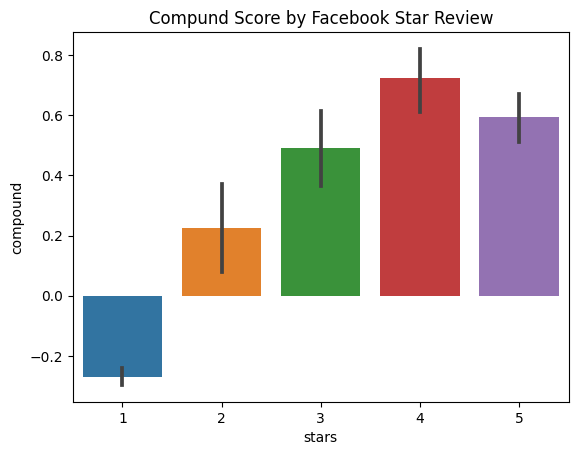

In [ ]:
ax = sns.barplot(data=vaders, x='stars', y='compound')
ax.set_title('Compund Score by Facebook Star Review')
plt.show()

For Positive, Neutral and Negative Scores

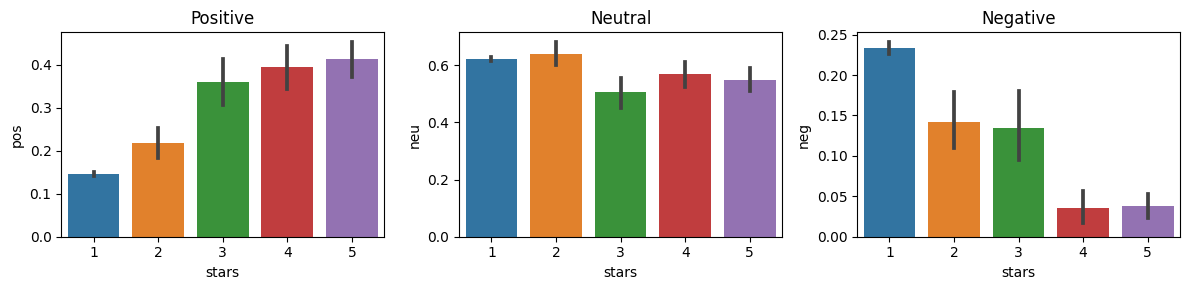

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='stars', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='stars', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='stars', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

#### Roberta Pretrained Model

Use a pre-trained language model for text classification.

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

Specify model name. This model is based on Roberta architecture, a powerful language model known for its performance in various text-related tasks.

Load the tokenizer with specified model to preprocess text input into numerical tokens.

Load the actual pre-trained model.

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Process text input using a pre-trained Roberta model and return sentiment polarity scores.

Tokenize the input text, then pass tokens to the model.

Extract the raw sentiment scores from model's output and convert them into a Numpy array.

Normalize the scores into probabilities between 0 and 1 and create a dictionary to organize scores for each different classes (negative, neutral, positive).

In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict


#### Combine and compare

Apply two different sentiment analysis techniques (VADER and RoBERTa) to text data within a dataframe, store results combined for each text and handle potential errors during processing.

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['corpus']
        myindex = row['index']
        vader_result = vds.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myindex] = both
    except RuntimeError:
        print(f'Broke for id {myindex}')

  0%|          | 0/1844 [00:00<?, ?it/s]

Integrate sentiment analysis results back into the original dataframe.

Create a combined dataset named *results_df* that facilitates further analysis and exploration of sentiment alongside other data attributes.

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'index'})
results_df = results_df.merge(df, how='left')

Create a multi-panel plot which shows relationships between sentiment scores from two different methods (VADER and RoBERTa) and how these scores vary across different star ratings.

This supports in understanding how sentiment aligns with numerical feedback and how different sentiment analysis techniques compare.

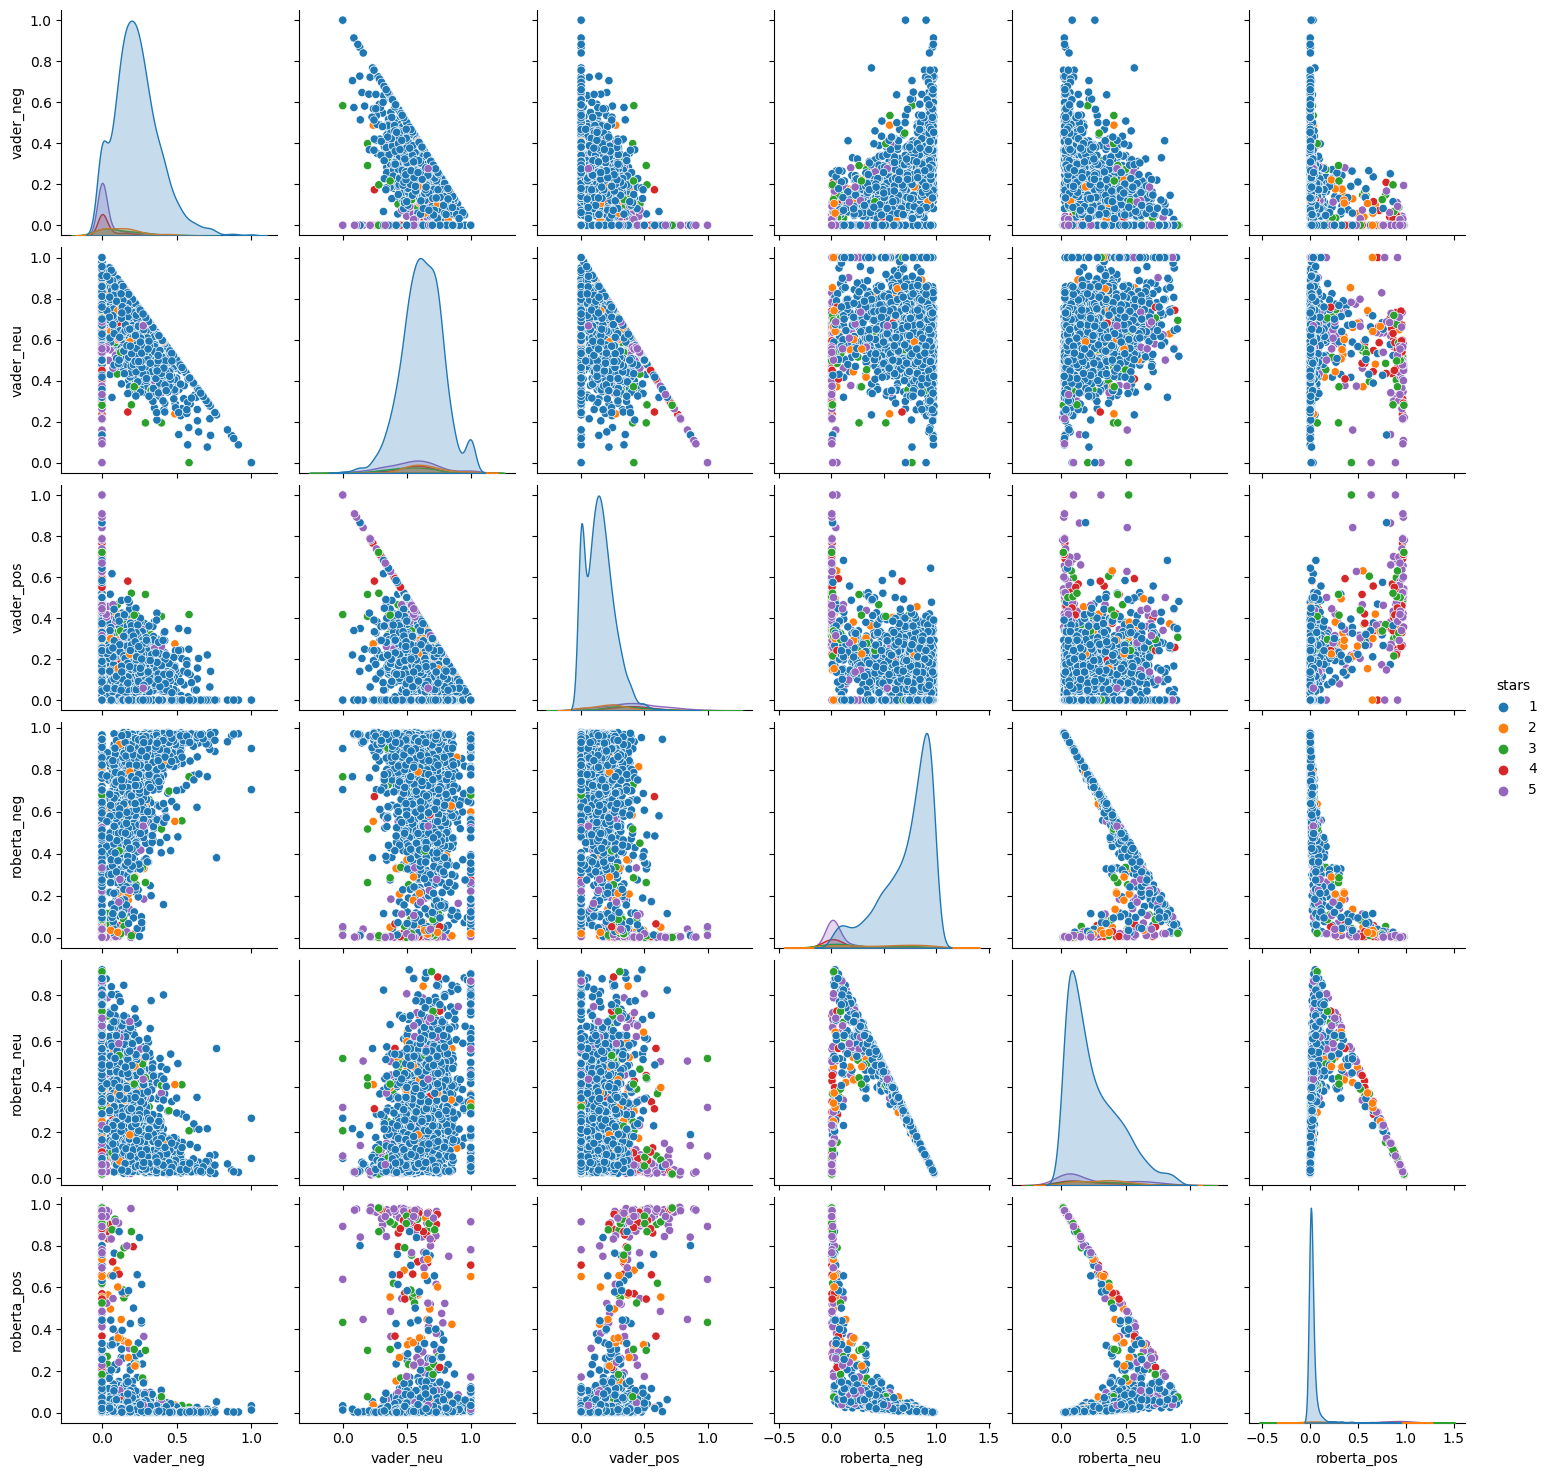

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='stars',
            palette='tab10')
plt.show()

# Sentiment Analyst using Machine Learning

Create a new column named label of dataframe df.

Checks if each element in the stars column. And if the star rating is equal 1, 2, 3, assign neg to the corresponding element in label column, indicating a negative review. If not, assign pos instead, indicating a positive review.

In [ ]:
df['label'] = np.where(df['stars'].isin([1, 2, 3]), 'neg', 'pos')

Prepare data for machine learning by selecting features and extracting labels.

X are the independent variables.

y is the dependent variable.

In [ ]:
X = df.iloc[:,4:5]
y=df['label']

In [ ]:
X

,corpus
0,facebook full romance scam vehicle scam crypto...
1,fb marketplace scammer paradise say half add s...
2,absolutely rubbish encourage report bullying a...
3,1 star generous facebook account active since ...
4,facebook let someone hack dead man account loa...
...,...
1839,thoroughly recommended quick efficient many th...
1840,facebook allows fake alias account people bad ...
1841,poor standard support reported video animal ki...
1842,nothing le world biggest pedophile site need s...


In [ ]:
y

0       neg
1       neg
2       neg
3       neg
4       neg
       ... 
1839    pos
1840    neg
1841    neg
1842    neg
1843    neg
Name: label, Length: 1844, dtype: object

Encode categorical labels (text labels) into numerical values. The encoder will determine the categories automatically from the data and store them in the categories attribute.

Transfrom the data will return a dense array of shape with the encoded values. The number of categories equal the number of columns.

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(y)

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

Split the dataset into 80% for training and 20% for testing.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

Transform text data in both training and test sets into TF-IDF (Term Frequency-Inverse Document Frequency) vectors.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [ ]:
X_train_tfidf = tfidf.fit_transform(X_train['corpus']).toarray()
X_test_tfidf = tfidf.transform(X_test['corpus'])

Choose relevant metrics for model evaluation (Accuracy Score, Confusion Matrix).

Choose some popular machine learning algorithms for classification (Random Forest, Decision Tree, Multinomial Naive Bayes).

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

K-Fold Cross Validation is a standard technique for estimating the performance of a machine learning algorithm on a dataset.

In this case, K = 5, it means, in the given dataset and we are splitting into 6 folds and running the Train and Test. During each run, one fold is considered for testing and the rest are for training and moving on with iterations.

In which each data point is used, once in the hold-out set and K-1 in Training. So, during the full iteration at least once, one fold will be used for testing and the rest for training.

In each iterations, we get an accuracy score. Then we sum them and find the mean.

</br>
</br>

Using K-Fold to estimate above models:


*   Define a K-Fold object with the specific number of folds, shuffle option and random state.

*   Loop through each model in the models list and perform cross validation using *cross_val_score* function, which returns an array of scores for each fold.

*   Store the model name, fold index and score in the *entries* list.
*   Convert the entries list into a DataFrame with three columns *model_name*, *fold_id*, *accuracy_score*.


*   If plot_results is True, plot a boxplot of the accuracy scores for each model, showing the mean and outliers.


*   Group the DataFrame by model name, then calculate the mean and standard deviation of the accuracy scores.


*   Concatenate the mean and standard deviation into a new DataFrame called *baseline_results*.
*   Sort the *baseline_results* by mean in descending order.

*   Return the *baseline_results* DataFrame.

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

seed = 1000
def generate_baseline_results(models, X, y, metrics, cv=5, plot_results=False):
    # define k-fold:
    kfold = KFold(n_splits=cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))

    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score'])

    if plot_results:
        sns.boxplot(x='model_name', y='accuracy_score', data=cv_df, color='lightblue', showmeans=True)
        plt.title("Boxplot of Base-Line Model Accuracy using 5-fold cross-validation")
        plt.xticks(rotation=45)
        plt.show()


    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()

    baseline_results = pd.concat([mean, std], axis=1)
    baseline_results.columns = ['Mean', 'Standard Deviation']


    baseline_results.sort_values(by='Mean', ascending=False, inplace=True)

    return baseline_results

models = [
   DecisionTreeClassifier(),
   RandomForestClassifier(),
   MultinomialNB()
]

baseline_results = generate_baseline_results(models, X_train_tfidf, y_train, metrics='accuracy', cv=5, plot_results=False)
print(baseline_results)

                            Mean  Standard Deviation
model_name                                          
RandomForestClassifier  0.917966            0.009406
MultinomialNB           0.907119            0.013041
DecisionTreeClassifier  0.885424            0.013216


Find the optimal hyperparameter configuration for a Random Forest Classifier model, aiming to improve its performance on a specific classification task.

In [ ]:
from sklearn.model_selection import GridSearchCV


rf = RandomForestClassifier()


param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


grid_search.fit(X_train_tfidf, y_train)


print("Best Parameters: ", grid_search.best_params_)


best_model = grid_search.best_estimator_

Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Train a previously identified best model (Decision Tree Classifier) on the training data and evaluate its accuracy on the test data.

In [ ]:
best_model.fit(X_train_tfidf,y_train)
y_pred = best_model.predict(X_test_tfidf)

accuracy_score(y_test,y_pred)

0.924119241192412

Display Confusion Matrix on the testing data.

In [ ]:
confusion_matrix(y_test,y_pred)

array([[332,  11],
       [ 17,   9]])